In [1]:
# importing literature
import numpy as np

from pandas.tseries import *
from pandas_datareader.data import DataReader
from pandas_datareader import data
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Dell\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
# US recession periods
usrec = DataReader('USREC', 'fred', '2000-01-01', '2018-01-31')
# NBER constraction periods
datacons = pd.read_excel('constration.xlsx')
datacons.set_index(datacons['Date'], inplace=True)
datacons.set_index('Date', inplace=True)
dateparse = lambda datacons: pd.to_datetime(datacons, format='%m%d%Y')

In [2]:
# all data are in the first differeance 
data = pd.read_excel('data2.xlsx')
data.set_index(data['Date'], inplace=True)
data.set_index('Date', inplace=True)

In [3]:
data.head()

,Gold return,Oil return,US bond yield,S&P,JP bond yield,Nikkei,jpy/usd return,GR 10-Y Bond Yield,DAX,eur/usd,Shanghai Composite,China 3-Year Bond Yield
Date,,,,,,,,,,,,
2000-03-01,-0.047880,-0.116004,-0.037977,0.104410,0.111233,-0.001756,-0.041568,-0.008666,-0.005907,-0.008811,0.049948,0.791904
2000-04-01,-0.019037,-0.043123,-0.063504,-0.036463,0.052527,-0.031391,0.023958,-0.048807,-0.024306,-0.045911,0.020053,0.791904
2000-05-01,-0.005126,0.127040,0.035988,-0.025856,-0.059322,-0.075203,-0.004809,0.015508,-0.041136,0.028061,0.031710,0.791904
2000-06-01,0.067722,0.120303,-0.038758,0.032167,-0.104104,-0.034881,-0.013753,-0.023944,-0.029743,0.015673,0.017714,0.791904
2000-07-01,-0.045846,-0.156000,0.008365,-0.019755,0.179888,0.014198,0.030152,0.008885,0.042353,-0.027609,0.049494,0.791904


In [15]:
summery_statistic= data.describe()
summery_statistic

,Gold return,Oil return,US bond yield,S&P,JP bond yield,Nikkei,jpy/usd return,GR 10-Y Bond Yield,DAX,eur/usd,Shanghai Composite,China 3-Year Bond Yield
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.008278,0.007480,-0.001072,0.004023,0.013008,0.001032,0.000492,-0.014170,0.004303,0.001458,0.006096,0.077569
std,0.049768,0.091807,0.085929,0.042104,0.380101,0.058521,0.027950,0.288651,0.060080,0.029644,0.077388,0.242583
min,-0.180050,-0.326212,-0.264484,-0.172583,-2.388889,-0.113867,-0.071301,-2.358333,-0.254222,-0.097206,-0.246314,-0.365438
25%,-0.023690,-0.052691,-0.050800,-0.018625,-0.119248,-0.039059,-0.017891,-0.051527,-0.027636,-0.014219,-0.042900,-0.028287
50%,0.007219,0.013945,-0.002689,0.009874,-0.040753,-0.004003,0.000967,-0.015763,0.009579,0.002160,0.006944,0.010278
75%,0.038166,0.070249,0.040149,0.029220,0.075610,0.028349,0.016083,0.039759,0.040271,0.019999,0.047751,0.059958
max,0.138672,0.297144,0.309589,0.109458,3.400000,0.312800,0.092063,1.100962,0.213778,0.100961,0.274464,0.791904


In [5]:
ss = pd.ExcelWriter('summery_statistic.xlsx', engine='xlsxwriter')
   
summery_statistic.to_excel(ss, 'Sheet1')

ss.save()

In [27]:
from arch.unitroot import ADF
for column in data:
    adf = ADF(data[column])
    print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -16.622
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -12.627
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                -11.757
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.88 (5%), -2.57 (10%)
Nu

In [9]:
mod_SP= sm.tsa.MarkovAutoregression(data['S&P'], k_regimes=2, order=1, trend='c', switching_ar=True, switching_variance=True)
res_SP= mod_SP.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=2)
print (res_SP.summary())
print res_SP.params

Optimization terminated successfully.
         Current function value: -1.899094
         Iterations: 37
         Function evaluations: 50
         Gradient evaluations: 50
                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 406.406
Date:                  Tue, 03 Apr 2018   AIC                           -796.812
Time:                          00:25:49   BIC                           -769.884
Sample:                      04-01-2000   HQIC                          -785.931
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [17]:
predict = mod_SP.predict(res_SP.params, start=None, end=None, probabilities=None, conditional=False)


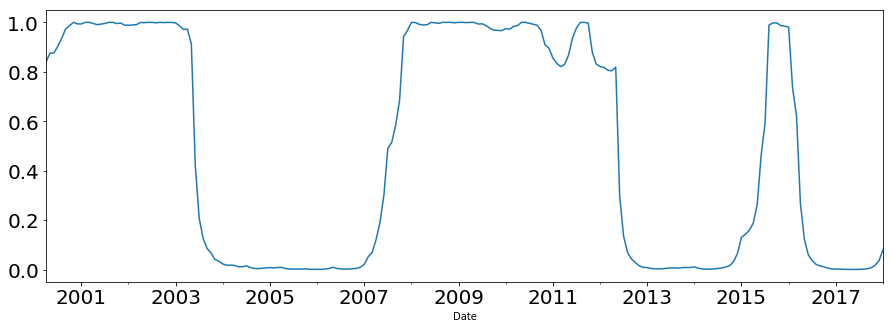

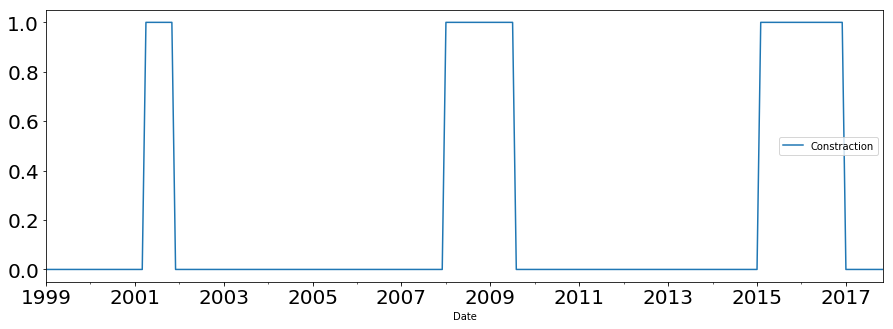

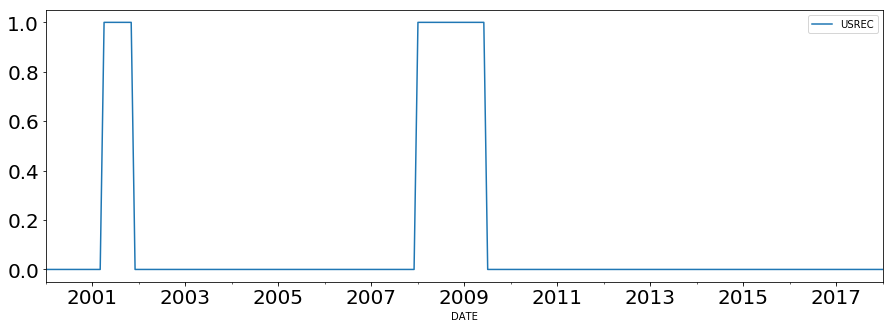

In [64]:
res_SP.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)
datacons.plot(figsize=(15,5), fontsize=20)
usrec.plot(figsize=(15,5), fontsize=20)

In [127]:
print res_SP.smoothed_marginal_probabilities[1].tail(4)

Date
2017-10-01    0.008284
2017-11-01    0.018105
2017-12-01    0.036469
2018-01-01    0.080759
Name: 1, dtype: float64


In [ ]:
# Model II with switching AR and variance terms -conditional on FED =model 4=

# Model III with switching AR and variance terms -conditional on VIX 

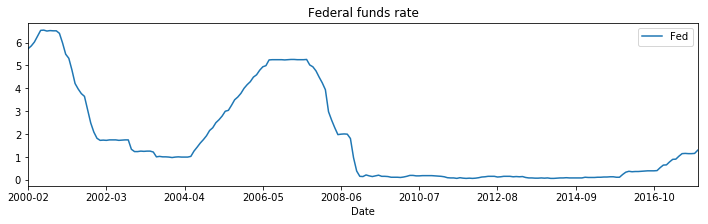

In [12]:
# Get the conditional information
fed = pd.read_excel('fed.xlsx')
fed.set_index(fed['Date'], inplace=True)
fed.set_index('Date', inplace=True)

fed.plot(title='Federal funds rate', figsize=(12,3))

In [167]:
mod_fed = sm.tsa.MarkovAutoregression(
    data['S&P'], k_regimes=2, order=1, switching_ar= True, switching_variance=True,
    exog_tvtp=sm.add_constant(fed["Fed"]))
res_fed=mod_fed.fit()
print(res_fed.summary())

                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 407.972
Date:                  Sun, 11 Feb 2018   AIC                           -795.944
Time:                          02:56:40   BIC                           -762.285
Sample:                      04-01-2000   HQIC                          -782.343
                           - 01-01-2018                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0119      0.002      6.277      0.000       0.008       0.016
sigma2         0.0005   8.29e-05    

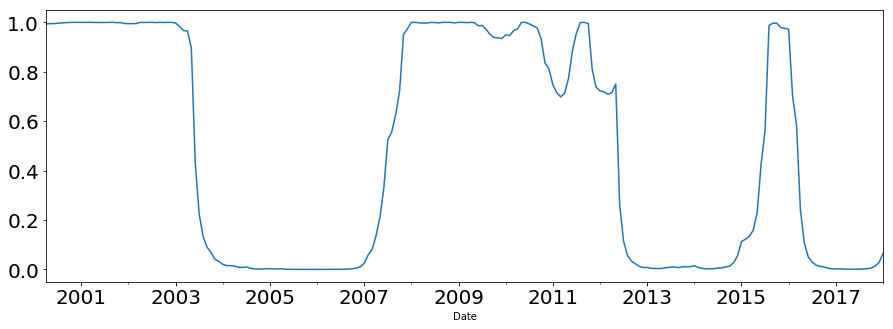

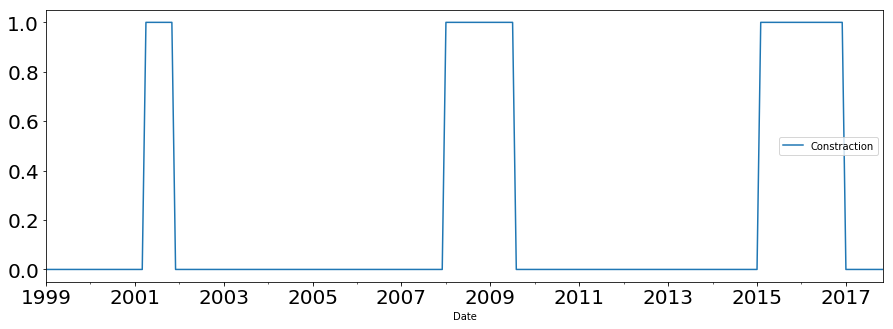

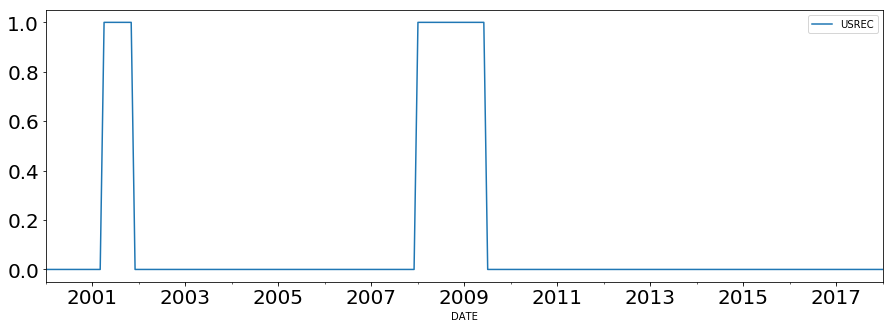

In [123]:
res_fed.smoothed_marginal_probabilities[1].plot(figsize=(15,5), fontsize=20)
datacons.plot(figsize=(15,5), fontsize=20)
usrec.plot(figsize=(15,5), fontsize=20)

In [126]:
print res_fed.smoothed_marginal_probabilities[1].tail(4)

Date
2017-10-01    0.006319
2017-11-01    0.013916
2017-12-01    0.028522
2018-01-01    0.064530
Name: 1, dtype: float64


               vix
date              
2000-02  23.370001
2000-03  24.110001


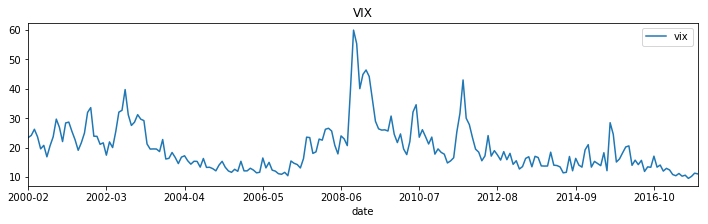

In [8]:
vix = pd.read_excel('vix.xlsx')
vix.set_index(vix['date'], inplace=True)
vix.set_index('date', inplace=True)

vix.plot(title='VIX', figsize=(12,3))
print vix.head(2)

In [25]:
mod_VIX = sm.tsa.MarkovAutoregression(data["S&P"], k_regimes=2, order=1, trend='c', exog=vix["vix"], switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX=mod_VIX.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX.summary())

Optimization terminated successfully.
         Current function value: -1.956984
         Iterations: 38
         Function evaluations: 49
         Gradient evaluations: 49
                         Markov Switching Model Results                         
Dep. Variable:                      S&P   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 418.795
Date:                  Sun, 11 Feb 2018   AIC                           -817.589
Time:                          19:08:05   BIC                           -783.929
Sample:                      04-01-2000   HQIC                          -803.988
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [46]:
mod_VIX_oil = sm.tsa.MarkovAutoregression(data["Oil return"], k_regimes=2, order=1, trend='c', exog=vix["vix"], switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_oil=mod_VIX_oil.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX_oil.summary())

Optimization terminated successfully.
         Current function value: -1.032786
         Iterations: 42
         Function evaluations: 50
         Gradient evaluations: 50
                         Markov Switching Model Results                         
Dep. Variable:               Oil return   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 221.016
Date:                  Sun, 11 Feb 2018   AIC                           -422.032
Time:                          19:37:30   BIC                           -388.373
Sample:                      04-01-2000   HQIC                          -408.431
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [49]:
mod_VIX_oil2 = sm.tsa.MarkovAutoregression(data["Oil return"], k_regimes=2, order=1, trend='c', exog_tvtp=sm.add_constant(fed["Fed"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_oil2=mod_VIX_oil2.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=1)
print(res_VIX_oil2.summary())


Optimization terminated successfully.
         Current function value: -1.020542
         Iterations: 65
         Function evaluations: 74
         Gradient evaluations: 74
                         Markov Switching Model Results                         
Dep. Variable:               Oil return   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 218.396
Date:                  Sun, 11 Feb 2018   AIC                           -416.792
Time:                          19:41:15   BIC                           -383.132
Sample:                      04-01-2000   HQIC                          -403.190
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [58]:
mod_VIX_eur = sm.tsa.MarkovAutoregression(data["eur/usd"], k_regimes=2, order=1, trend='c',exog=(vix["vix"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_eur=mod_VIX_eur.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=5)
print(res_VIX_eur.summary())

Optimization terminated successfully.
         Current function value: -2.148087
         Iterations: 47
         Function evaluations: 64
         Gradient evaluations: 64
                         Markov Switching Model Results                         
Dep. Variable:                  eur/usd   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 459.691
Date:                  Sun, 11 Feb 2018   AIC                           -899.381
Time:                          19:52:09   BIC                           -865.722
Sample:                      04-01-2000   HQIC                          -885.780
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [62]:
mod_VIX_ub = sm.tsa.MarkovAutoregression(data["US bond yield"], k_regimes=2, order=1, trend='c', exog=(vix["vix"]), switching_ar= True,switching_exog=True, switching_variance=True)
res_VIX_ub=mod_VIX_ub.fit(cov_type="opg", maxiter=200, full_output=True,disp=True,em_iter=5)
print(res_VIX_ub.summary())

Optimization terminated successfully.
         Current function value: -1.149485
         Iterations: 41
         Function evaluations: 49
         Gradient evaluations: 49
                         Markov Switching Model Results                         
Dep. Variable:            US bond yield   No. Observations:                  214
Model:             MarkovAutoregression   Log Likelihood                 245.990
Date:                  Sun, 11 Feb 2018   AIC                           -471.980
Time:                          20:05:37   BIC                           -438.320
Sample:                      04-01-2000   HQIC                          -458.378
                           - 01-01-2018                                         
Covariance Type:                    opg                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------